Details of the columns:

PassengerId: The identifier of each passenger.

Survived: Indicates whether the passenger survived 
(1) or did not survive 
(0) the Titanic disaster.

Pclass: The class of ticket the passenger purchased. It is a proxy for socioeconomic status:
1 = First Class
2 = Second Class
3 = Third Class

Name: The passenger's name, which may include titles (e.g., Mr., Mrs., Miss).

Sex: The passenger's gender (male or female).

Age: The passenger's age in years.

SibSp: The number of siblings or spouses the passenger had on board the Titanic.

Parch: The number of parents or children the passenger had on board the Titanic.

Ticket: The ticket number the passenger used to board the Titanic.

Fare: The amount the passenger paid for the ticket.

Cabin: The cabin number the passenger was in.

Embarked: The port at which the passenger boarded the Titanic, represented as follows:
C = Cherbourg
Q = Queenstown
S = Southampton


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import confusion_matrix, classification_report

In [95]:
df = pd.read_csv('Titanic-Dataset.csv')
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
196,197,0,3,"Mernagh, Mr. Robert",male,NaN,0,0,368703,7.7500,NaN,Q
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
244,245,0,3,"Attalah, Mr. Sleiman",male,30.0,0,0,2694,7.2250,NaN,C
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,349201,7.8958,NaN,S
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
553,554,1,3,"Leeni, Mr. Fahim (""Philip Zenni"")",male,22.0,0,0,2620,7.2250,NaN,C
352,353,0,3,"Elias, Mr. Tannous",male,15.0,1,1,2695,7.2292,NaN,C
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.2000,B41,C
395,396,0,3,"Johansson, Mr. Erik",male,22.0,0,0,350052,7.7958,NaN,S


In [96]:
df.tail

<bound method NDFrame.tail of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [97]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [100]:
df.isna().sum().sum().item()
#the sum of a missing value.

866

In [101]:
df.duplicated().sum().item()
#not found duplicate value.

0

In [102]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Data Cleaning


In [103]:
df.isna().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [104]:
df['Age'] = df['Age'].fillna(df['Age'].median())

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
df.drop(columns='Cabin', inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [106]:
df[df['Embarked'].isna()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [107]:
df[df['Ticket'] ==  '113572']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [108]:
df.dropna(inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

,Survived
0,549
1,340


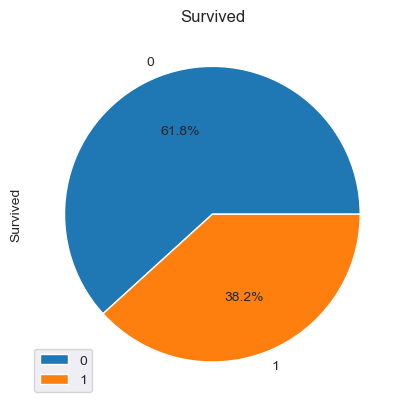

In [109]:
# 0- Not survived , 1 -Survived
survived = df['Survived'].value_counts()

survived.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Survived')
pd.DataFrame(survived)

Most of the Passengers on the Titanic did not Survive, It amounts value to 61.8% not survive.

,Pclass
3,491
1,214
2,184


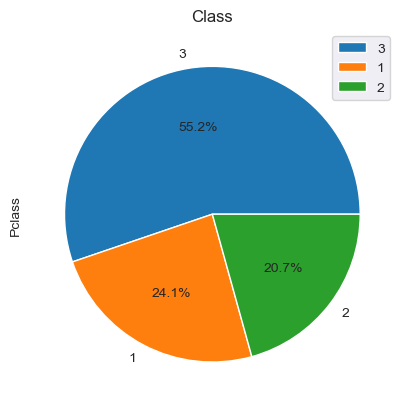

In [110]:
Pclass = df['Pclass'].value_counts()

Pclass.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Class')
pd.DataFrame(Pclass )

,Sex
male,577
female,312


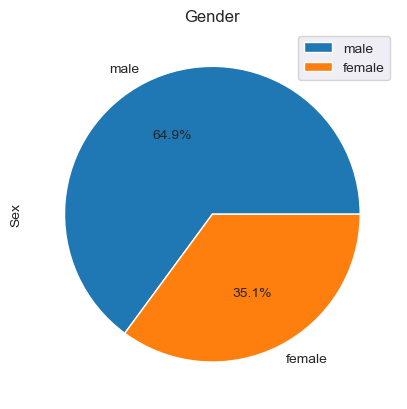

In [111]:
sex = df['Sex'].value_counts()

sex.plot(kind='pie', autopct='%1.1f%%', legend=True, title='Gender')
pd.DataFrame(sex)

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [113]:
age = df['Age']
pd.DataFrame(age.describe())


,Age
count,889.000000
mean,29.315152
std,12.984932
min,0.420000
25%,22.000000
50%,28.000000
75%,35.000000
max,80.000000


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

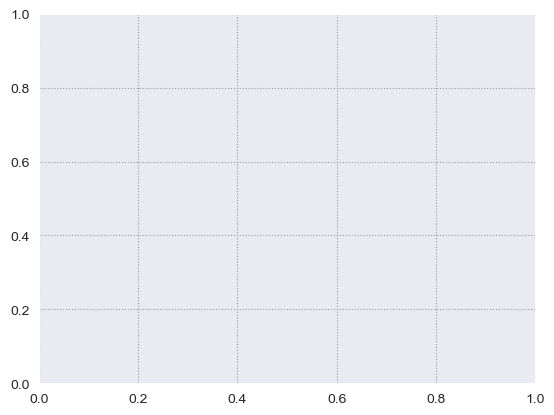

In [114]:
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
sns.histplot(age, kde=True, color='green', edgecolor='black')
plt.show()

,SibSp
0,606
1,209
2,28
4,18
3,16
8,7
5,5


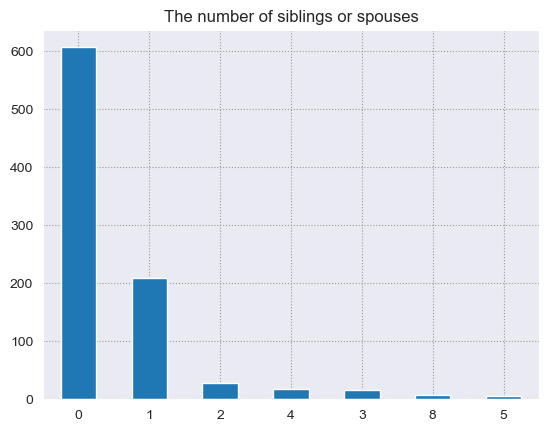

In [115]:
sibsp = df['SibSp'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
sibsp.plot(kind='bar', title='The number of siblings or spouses')
plt.xticks(rotation=0)
pd.DataFrame(sibsp)

,Parch
0,676
1,118
2,80
5,5
3,5
4,4
6,1


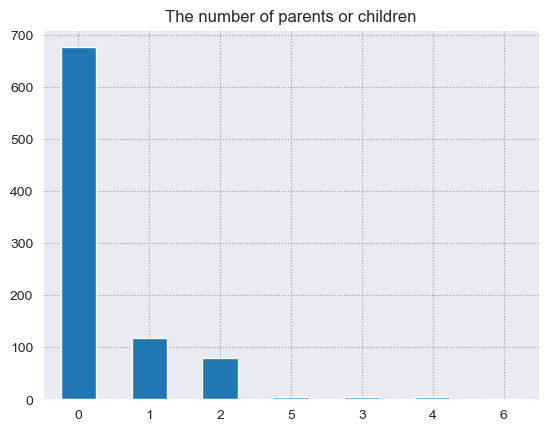

In [116]:
parch = df['Parch'].value_counts()

sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
parch.plot(kind='bar', title='The number of parents or children')
plt.xticks(rotation=0)
pd.DataFrame(parch)

In [117]:
fare = df['Fare']
pd.DataFrame(fare.describe())

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

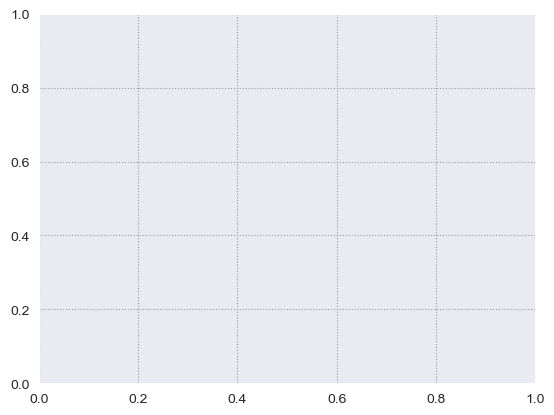

In [118]:
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
sns.histplot(fare, kde=True, color='#C72525', edgecolor='black')
plt.show()

In [119]:
fare = df['Fare']
pd.DataFrame(fare.describe())

,Fare
count,889.000000
mean,32.096681
std,49.697504
min,0.000000
25%,7.895800
50%,14.454200
75%,31.000000
max,512.329200


IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

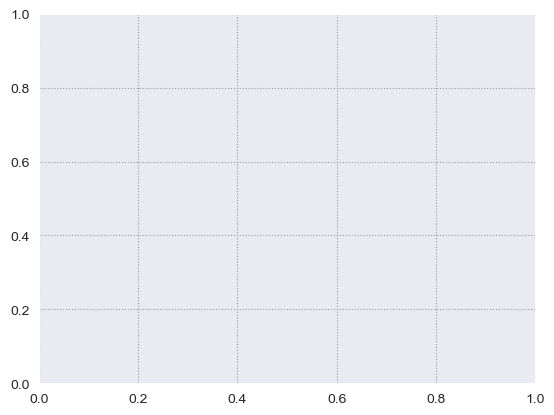

In [120]:
sns.set_style('darkgrid', {"grid.color": "0.6", "grid.linestyle": ":"})
sns.histplot(fare, kde=True, color='#C72525', edgecolor='black')
plt.show()